<a href="https://colab.research.google.com/github/Aman-1412/Aman-1412.github.io/blob/master/DLGeeks_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
tf.__version__

'1.14.0'

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_test_categorical.shape

(10000, 10)

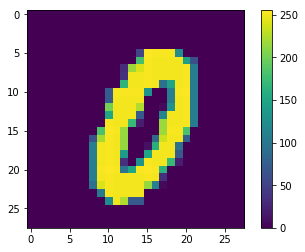

In [5]:
plt.figure()
plt.imshow(X_train[34])
plt.colorbar()
plt.show()

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

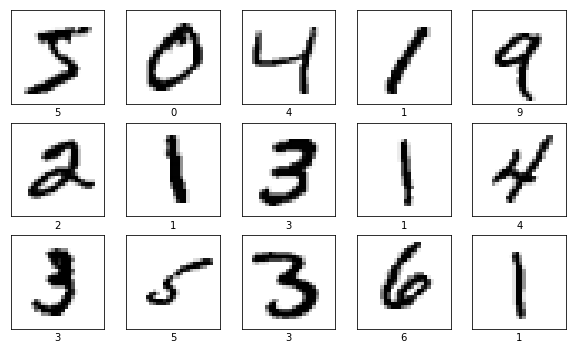

In [7]:
plt.figure(figsize = (10, 10))
for i in range(15):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap = plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

In [0]:
num_of_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_of_pixels).astype("float32")
X_test = X_test.reshape(X_test.shape[0], num_of_pixels).astype("float32")

In [0]:
def four_layer_model():
  model = Sequential()
  model.add(Dense(128, input_dim = num_of_pixels, activation = 'relu', kernel_initializer = 'glorot_normal', use_bias = True))
  model.add(Dropout(rate = 0.4))
  model.add(Dense(64, activation = 'relu', kernel_initializer = 'glorot_normal', use_bias = True))
  model.add(Dropout(rate = 0.4))
  model.add(Dense(64, activation = 'relu', kernel_initializer = 'glorot_normal', use_bias = True))
  model.add(Dense(y_train_categorical.shape[1], activation = 'softmax', kernel_initializer = 'glorot_normal', use_bias = True))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 

In [10]:
model = four_layer_model()
model.fit(X_train, y_train_categorical, batch_size = 128, epochs = 15, verbose = 2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/15
60000/60000 - 2s - loss: 0.6434 - acc: 0.7991
Epoch 2/15
60000/60000 - 2s - loss: 0.2922 - acc: 0.9171
Epoch 3/15
60000/60000 - 2s - loss: 0.2318 - acc: 0.9342
Epoch 4/15
60000/60000 - 2s - loss: 0.2008 - acc: 0.9425
Epoch 5/15
60000/60000 - 2s - loss: 0.1818 - acc: 0.9473
Epoch 6/15
60000/60000 - 2s - loss: 0.1584 - acc: 0.9532
Epoch 7/15
60000/60000 - 2s - loss: 0.1542 - acc: 0.9552
Epoch 8/15
60000/60000 - 2s - loss: 0.1416 - acc: 0.9582
Epoch 9/15
60000/60000 - 2s - loss: 0.1375 - acc: 0.9597
Epoch 10/15
60000/60000 - 2s - loss: 0.1291 - acc: 0.9624
Epoch 11/15
60000/60000 - 2s - loss: 0.1263 - acc: 0.9627
Epoch 12/15
60000/60000 - 2s - loss: 0.1230 - acc: 0.9643
Epoch 13/15
60000/60000 - 2s - loss: 0.1169 - acc: 0.9657
Epoch 14/15
60000/60000 - 2s - loss: 0.1121 - acc: 0.9662
Epoch 15/15
60000/60000 - 2s - loss: 0.1076 - acc: 0.9682


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose = 2)

10000/10000 - 1s - loss: 0.0839 - acc: 0.9763


In [12]:
print(f"Test accuracy: {test_acc}")
print(f"Baseline error: {100 - test_acc * 100}")

Test accuracy: 0.9763000011444092
Baseline error: 2.369999885559082


In [13]:
predictions = model.predict(X_test)
print(predictions[0])
print(f"Predicted class: {np.argmax(predictions[0])} \nActual class: {y_test[0]} \
      \nPredicted class probability: {np.max(predictions[0]) * 100}")

[1.8096321e-12 1.5998523e-07 7.4842575e-07 5.1833954e-06 1.0193719e-09
 5.5960228e-09 5.7810965e-17 9.9999380e-01 1.2669331e-10 1.1614226e-07]
Predicted class: 7 
Actual class: 7       
Predicted class probability: 99.99938011169434
